<a href="https://colab.research.google.com/github/zapata-git/Evaluacion-de-seguros-de-vida-para-Prudential-/blob/main/01%20-%20Exploraci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ProyectoIA_Seguros_Prudential**
*Este conjunto de datos contiene información sobre solicitantes de seguros para la compañía Prudential. Se busca crear un algoritmo que perfile solicitantes en una escala de 8 niveles.*

*El conjunto de datos proporcionado contiene variables que describen los atributos de los solicitantes de seguros de vida. La tarea consiste en predecir la variable "Response" para cada ID en el conjunto de prueba. "Response" es una medida ordinal de riesgo que tiene 8 niveles.*

---




#Preparación de datos.
Importamos las bibliotecas necesarias y cargamos el conjunto de datos:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Mounted at /content/drive


#Instalación de Jovian y Kaggle mediante pip

* El paquete jovian se utiliza para guardar y compartir proyectos de ciencia de datos en línea.

* El paquete kaggle proporciona una API de línea de comandos para interactuar con Kaggle, una plataforma en línea para competiciones de ciencia de datos y conjuntos de datos.

In [ ]:
!pip install jovian --upgrade --quiet
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian

In [ ]:
#PARA EJECUTAR ESTA LÍNEA, EN EL COMPUTADOR QUE SE EJECUTE DEBE HABER UNA COPIA DEL JSON WEB TOKEN
#DESCARGABLE DESDE LA PÁGINA DE UNA CUENTA DE KAGGLE EN https://www.kaggle.com/settings/account?...
#ESTE JSON WEB TOKEN ES PERSONAL DE CADA CUENTA Y SIRVE COMO IDENTIFICADOR DE ACCESO.
#CARGUE EL JSON QUE USTED DESCARGÓ DE SU CUENTA DE KAGGLE
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlosozapata","key":"1ea90523afd866a234b17caeb4677869"}'}

#Extracción de los archivos del conjunto de datos descargados desde Kaggle

* El conjunto de datos descargado ya contiene separados los datos de train y de test.

* Los archivos quedan almacenados en el entorno de ejecución de Google Colab siempre y cuando se haya autorizado el acceso de la cuenta de Google a este. Esto se debió realizar en bloques de código anteriores.

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
#Para descargar el conjunto de datos desde Kaggle al drive local de Google
!kaggle competitions download 'prudential-life-insurance-assessment'

  0% 0.00/3.24M [00:00<?, ?B/s]
100% 3.24M/3.24M [00:00<00:00, 265MB/s]


In [ ]:
#Para descomprimir los archivos .zip que haya y guardarlos en el entorno de ejecución
import os
from zipfile import ZipFile 
  
#Se indica el nombre del archivo  traído desde Kaggle
file = "prudential-life-insurance-assessment.zip"
  
#Se abre el archivo en modo lectura
with ZipFile(file, 'r') as zip:
  
    #Se extraen todos los archivos
    print('Extracción de archivos en proceso...') 
    zip.extractall() 
    print('Extracción terminada')

%cd "/content/"

for archivo in os.listdir():
  if archivo.endswith(".zip"):
    with ZipFile(archivo, 'r') as zip_ref:
      zip_ref.extractall("/content/")



Extracción de archivos en proceso...
Extracción terminada
/content


# Análisis exploratorio de datos (EDA)
En el EDA (Análisis Exploratorio de Datos) para el proyecto de IA de Seguros Prudential, se llevará a cabo una exploración de los datos a disposición para entender mejor el contenido del conjunto de datos, los patrones, relaciones y características de estos, y detectar posibles problemas y oportunidades para mejorar el modelo de IA.


In [ ]:
#Cuantificar el conjunto de datos
datos = pd.read_csv("/content/train.csv")
print(f"Cantidad de filas en el archivo de entrenamiento:\t{datos.shape[0]}")
print(f"Cantidad de columnas en el archivo de entrenamiento:\t{datos.shape[1]}")

Cantidad de filas en el archivo de entrenamiento:	59381
Cantidad de columnas en el archivo de entrenamiento:	128


In [ ]:
#Identificación de los tipos de datos por columna
for columna in datos.columns:
  print("%20s"%columna, datos[columna].dtype)

                  Id int64
      Product_Info_1 int64
      Product_Info_2 object
      Product_Info_3 int64
      Product_Info_4 float64
      Product_Info_5 int64
      Product_Info_6 int64
      Product_Info_7 int64
             Ins_Age float64
                  Ht float64
                  Wt float64
                 BMI float64
   Employment_Info_1 float64
   Employment_Info_2 int64
   Employment_Info_3 int64
   Employment_Info_4 float64
   Employment_Info_5 int64
   Employment_Info_6 float64
       InsuredInfo_1 int64
       InsuredInfo_2 int64
       InsuredInfo_3 int64
       InsuredInfo_4 int64
       InsuredInfo_5 int64
       InsuredInfo_6 int64
       InsuredInfo_7 int64
 Insurance_History_1 int64
 Insurance_History_2 int64
 Insurance_History_3 int64
 Insurance_History_4 int64
 Insurance_History_5 float64
 Insurance_History_7 int64
 Insurance_History_8 int64
 Insurance_History_9 int64
       Family_Hist_1 int64
       Family_Hist_2 float64
       Family_Hist_3 float64
     

Cada fila representa un solicitante de seguro de vida y cada columna representa una característica de riesgo relacionada con el solicitante, como edad, altura, peso, etc.

#Distribución del conjunto de datos 
El siguiente histograma muestra la distribución del conjunto de datos de los solicitantes por sus clasificaciones de riesgo determinadas (es decir, Response).

Es importante señalar que la distribución está desequilibrada y sesgada hacia las clases 6-8, aunque las clases 1-2 también representan una proporción notable del conjunto de datos.

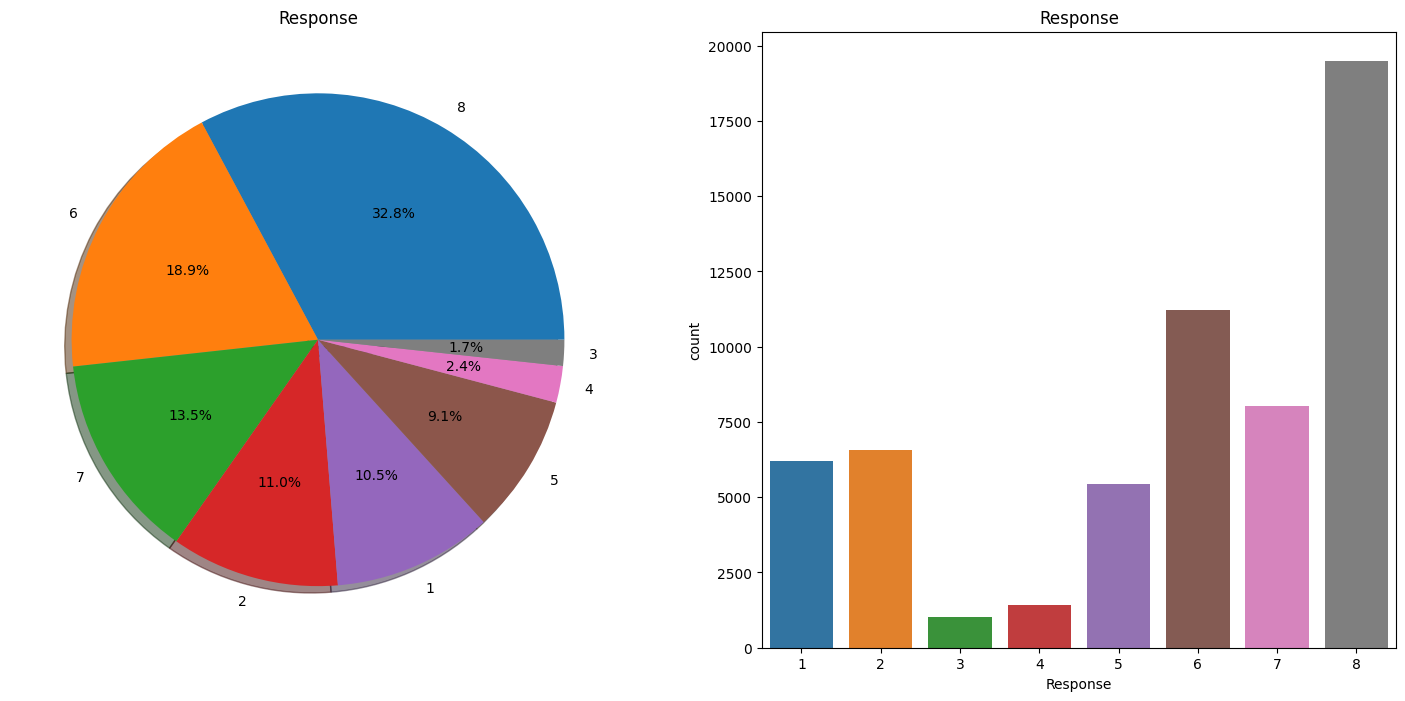

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
datos['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot(x='Response',data=datos,ax=ax[1])
ax[1].set_title('Response')
plt.show()

# Exploración del conjunto de datos



In [ ]:
# Crear DataFrame booleano indicando valores faltantes
valores_faltantes = datos.isnull()

# Obtener la cantidad total de valores faltantes por columna
cantidad_faltantes = valores_faltantes.sum()
cantidad_faltantes

Id                    0
Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 128, dtype: int64

Debido a lo poco informativa que ha resultado ser esta exploración, se procede a elaborar un gráfico de bandas por columna en el que se visualice por medio de un código de colores la presencia o ausencia de datos. El color violeta indica presencia de datos y el color verde representa presencia de datos nulos. Se observa que en conjunto de datos a analizar carece de datos en algunas columnas.

In [ ]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(650,325)).add_subplot(111)
ax.imshow(datos.isna().values.T, cmap='viridis')
ax.set_aspect(12)
plt.yticks(range(datos.shape[1]), datos.columns);
#DAR CLIC EN LA BARRA GRÁFICA PARA AMPLIARLA Y OBSERVAR LA DISTRIBUCIÓN  DE VALORES VACÍOS POR CATEGORÍA

In [ ]:
#Exploración básica de los datos
datos._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.0
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.0
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_45,59381.0,0.013691,0.116207,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,59381.0,0.008488,0.091737,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,59381.0,0.019905,0.139676,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_48,59381.0,0.054496,0.226995,0.0,0.000000,0.000000,0.000000,1.0


La salida proporciona estadísticas descriptivas para todas las variables numéricas del DataFrame datos.

 * La variable **Id** tiene un rango de valores desde 2 hasta 79146, con un promedio de 39507.2 y una desviación estándar de 22815.9.
 * La variable **Product_Info_1** tiene un promedio de 1.026, con un mínimo de 1 y un máximo de 2.
 * La variable **Product_Info_3** tiene un promedio de 24.4, con un mínimo de 1 y un máximo de 38.
 * La variable **Product_Info_4** tiene un promedio de 0.33, con un mínimo de 0 y un máximo de 1.
 * La variable **Product_Info_5** tiene un promedio de 2.01, con un mínimo de 2 y un máximo de 3.
 * Las variables **Medical_History_1 a Medical_History_41 y Medical_Keyword_1** a Medical_Keyword_48 son variables binarias que indican la presencia o ausencia de ciertos diagnósticos o palabras clave médicas en el historial médico del solicitante. Las estadísticas descriptivas proporcionan el promedio, el valor mínimo y máximo, y el porcentaje de veces que aparece cada variable.

Es importante tener en cuenta que estas estadísticas solo proporcionan una idea superficial de los datos, y una exploración más detallada sería necesaria para entender mejor la distribución de los datos y posibles valores atípicos o anomalías.

#Eliminación aleatoria de datos
Basados en el requerimiento de que el conjunto de datos debe carecer de por lo menos el 5% de sus datos, se buscó verificar si el conjunto de datos está completo y ello se realizó graficándolo de tal manera que se indique allá donde hayan datos faltantes.

En  el gráfico observado anteriormente, el color amarillo indica la presencia de valores nulos (datos faltantes) en el conjunto de datos, mientras que el color violeta indica la presencia de datos existentes.

La salida del gráfico muestra una distribución de los valores faltantes por categoría. Cada categoría es representada por una columna en el eje Y, y las filas representan las observaciones o muestras en el conjunto de datos. La cantidad de valores faltantes por categoría se puede visualizar por la cantidad de celdas amarillas en cada columna.

#Matriz de Correlación 
Para generar un mapa de calor que muestre la correlación entre todas las variables del conjunto de datos, se utilizara la función seaborn.heatmap(). Esta función permitirá visualizar las relaciones entre cada par de variables y descubrir posibles interacciones dentro de los datos. El conjunto de datos que se va a utilizar se llama main_data_index_set.

<ipython-input-15-8beb6fe5402f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = datos.corr()


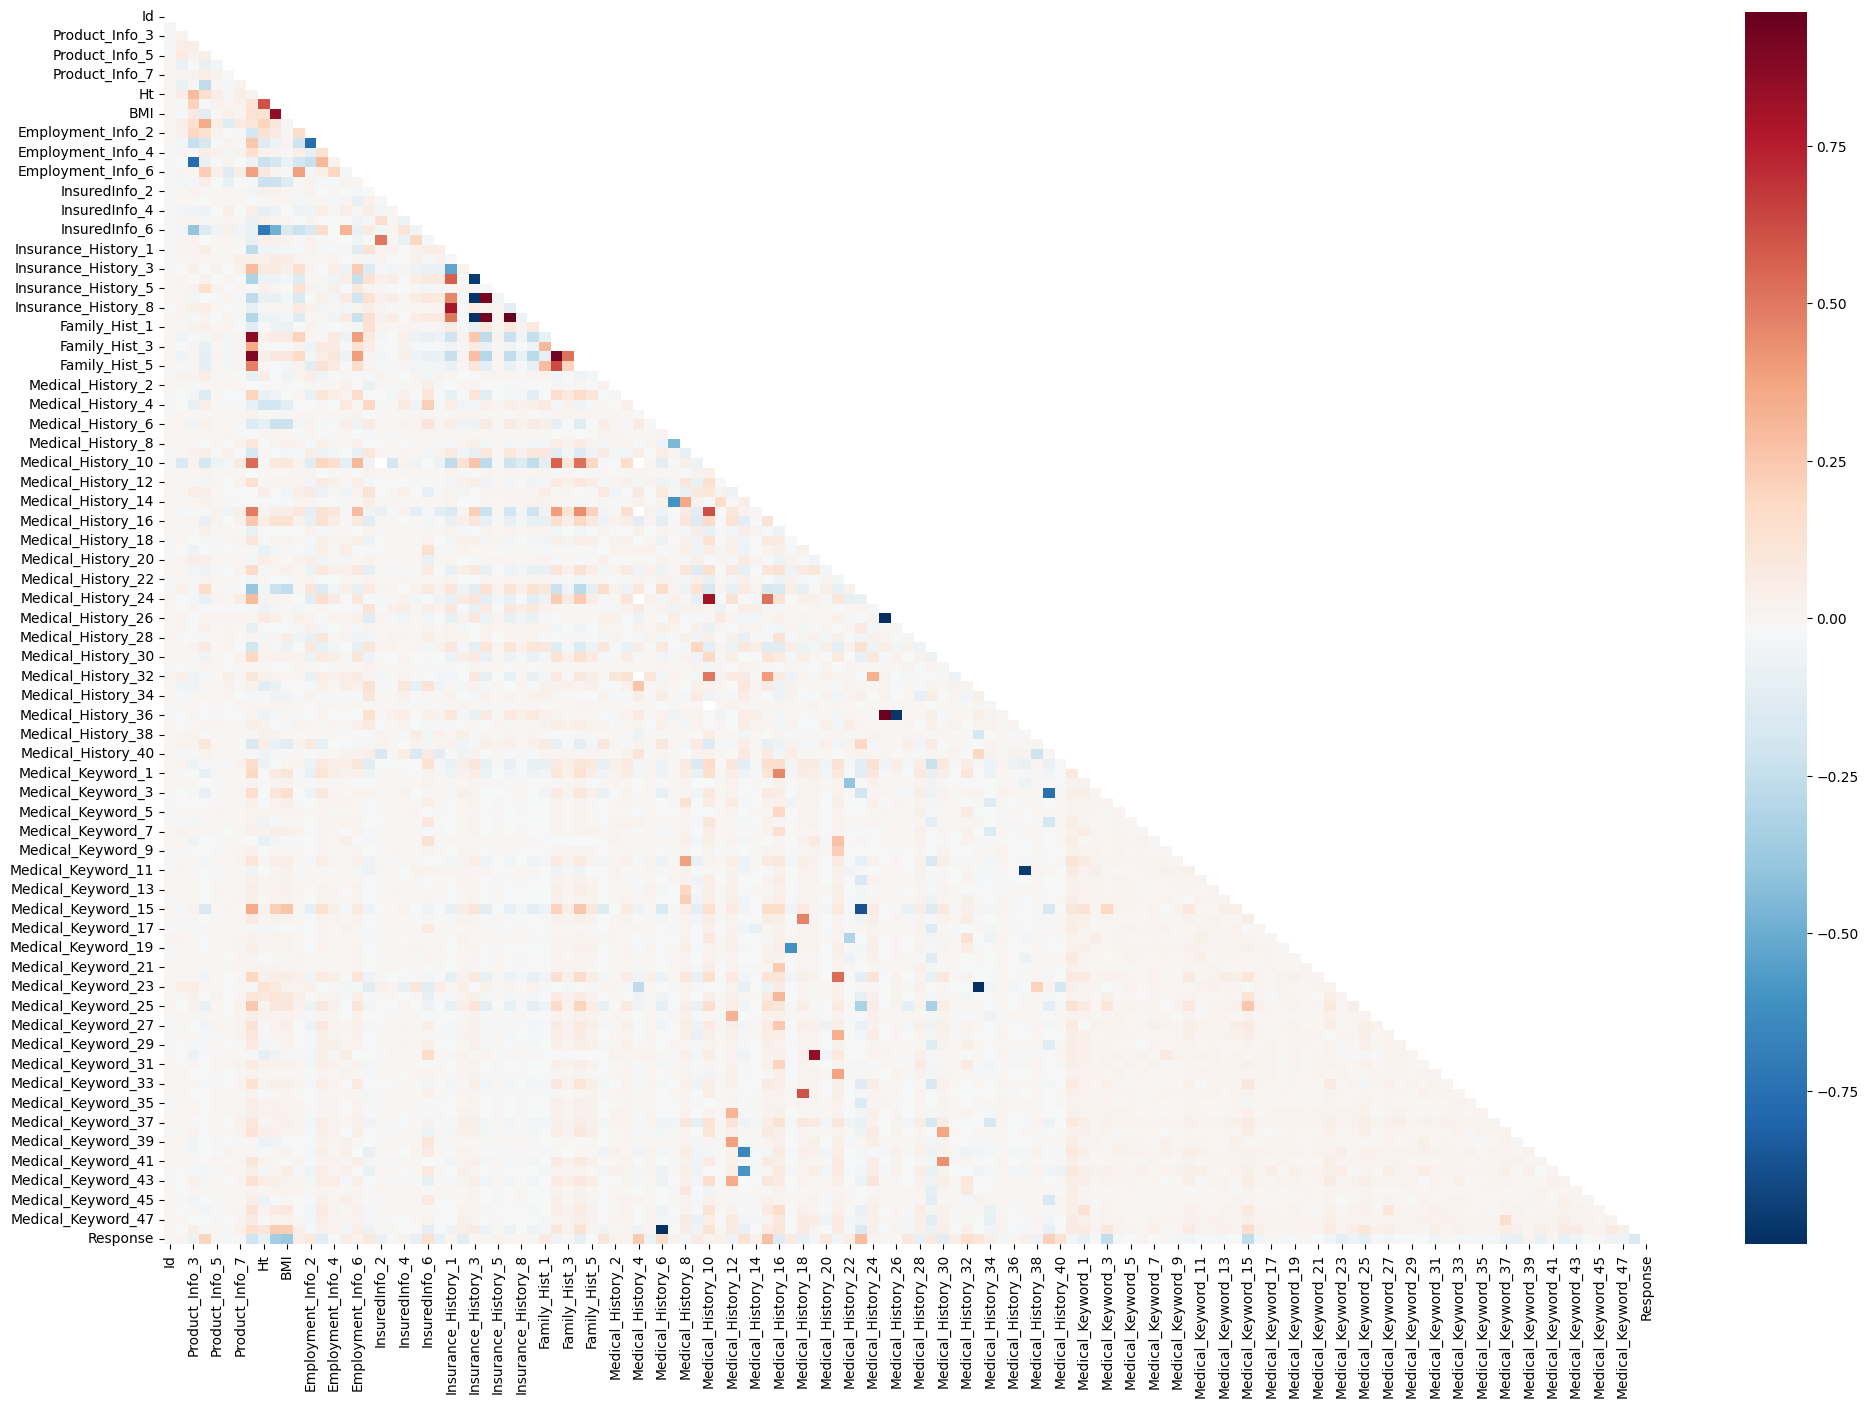

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Producir una matriz de correlación de los datos - luego, crear una máscara para ocultar la mitad superior derecha de la matriz.
corrs = datos.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

# Convertir la matriz de correlación en un mapa de calor usando Seaborn.
plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()

La matriz de correlación de los datos en la siguiente tabla que muestra la relación entre cada par de variables en el conjunto de datos.
 La diagonal de la tabla contiene la correlación entre cada variable consigo misma (que siempre será 1), mientras que la parte superior derecha e inferior izquierda de la tabla contienen duplicados innecesarios, ya que la correlación entre A y B es la misma que la correlación entre B y A. Por lo tanto, se crea una máscara para ocultar la mitad superior derecha de la matriz, que contiene estos duplicados.

El gráfico resultante muestra una representación visual de la matriz de correlación utilizando un mapa de calor, donde los valores más altos de correlación se muestran en un color más oscuro y los valores más bajos de correlación se muestran en un color más claro. A partir del gráfico, se pueden inferir ciertos patrones de correlación entre las diferentes columnas de características del conjunto de datos. Los diferentes conjuntos de columnas son los siguientes:

**Conjunto de Columnas 1** - Información del Producto: Muestran poca interacción/correlación con la mayoría de los otros conjuntos de características, con excepción de Employment_Info_1, Employment_Info_5 e Insured_Info_6, que pueden estar directamente correlacionados. Por ejemplo, el estado laboral/financiero de un solicitante tendrá un impacto en el tipo de póliza/producto que está solicitando.

**Conjunto de Columnas 2**- Información del Solicitante: Estas columnas muestran una variedad de interacciones con los otros conjuntos de características; las correlaciones más fuertes (positivas o negativas) son entre algunas de las columnas de Family_Hist y también Insured_Info_6.

**Conjunto de Columnas 3** - Información de Empleo: Con la excepción de dos fuertes anticorrelaciones - entre Employment_Info_2 y Employment_Info_3, además de entre Employment_Info_5 y Product_Info_3 - y algunas interacciones moderadas entre Employment_Info_6 y Family_Hist_2/Family_Hist_4, este conjunto de columnas no interactúa muy fuertemente con el resto de las características.

**Conjunto de Columnas 4** - Información Asegurada: La columna InsuredInfo_2 muestra una correlación bastante fuerte con InsuredInfo_7, y también una fuerte anticorrelación con algunas de las columnas de Información del Solicitante; de lo contrario, este conjunto de columnas no interactúa mucho con el resto de las características.

**Conjunto de Columnas 5** - Información de Historial de Seguros: Este conjunto de características muestra varias intercorrelaciones fuertes con otras columnas de Historial de Seguros, pero no interactúa mucho con el resto de las características.

**Conjunto de Columnas 6** - Información de Historial Familiar: Las columnas Family_Hist_2 y Family_Hist_4 muestran una correlación positiva muy fuerte con Ins_Age, y también con Medical_History_10 y Medical_History_15 en menor grado.

**Conjunto de Columnas 7** - Información de Historial Médico: Este conjunto de columnas muestra varios puntos de correlación con varias columnas de Palabras Clave Médicas, así como con Ins_Age y algunas de las columnas de Historial Familiar.
**Conjunto de Columnas 8** - Información de Palabras Clave



In [ ]:
#Más indagación en las variables, a partir de ellas en formato de columna, se buscan las variables categóricas
columnas = [i for i in  datos.columns if i not in datos._get_numeric_data()]
print(columnas)

['Product_Info_2']


In [ ]:
#Se identifican las categorías componentes de la o las columnas categóricas existentes
import numpy as np
for columna in columnas:
  print("%10s"%columna, np.unique(datos[columna].dropna()))

Product_Info_2 ['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'B1' 'B2' 'C1' 'C2' 'C3' 'C4'
 'D1' 'D2' 'D3' 'D4' 'E1']


In [ ]:
#Se cuenta la frecuencia de cada categoría dentro de la columna categórica  identificada
columna = columnas[0]
print(f"La columna con  valores categóricos a mostrar es {columna}")
datos[columna].value_counts()

La columna con  valores categóricos a mostrar es Product_Info_2


D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

<ipython-input-19-e384c8e2735e>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 2)


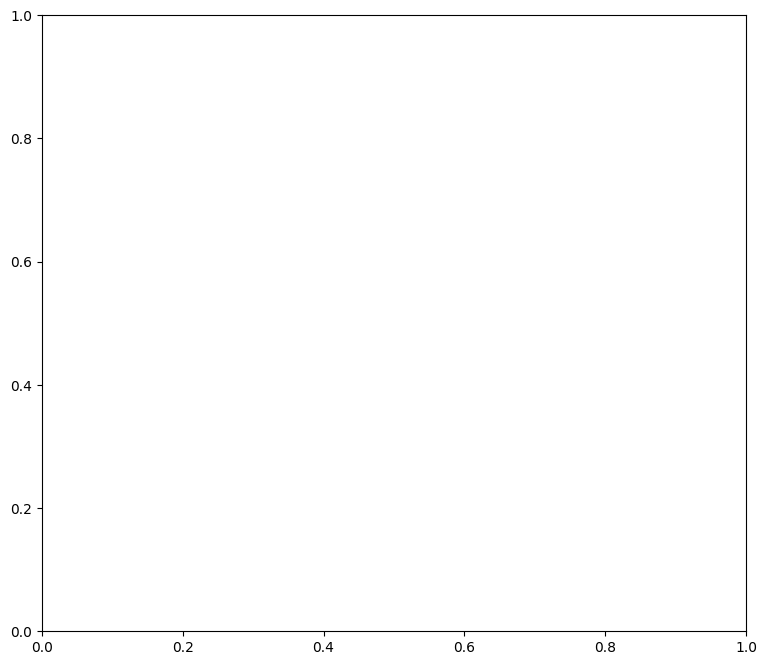

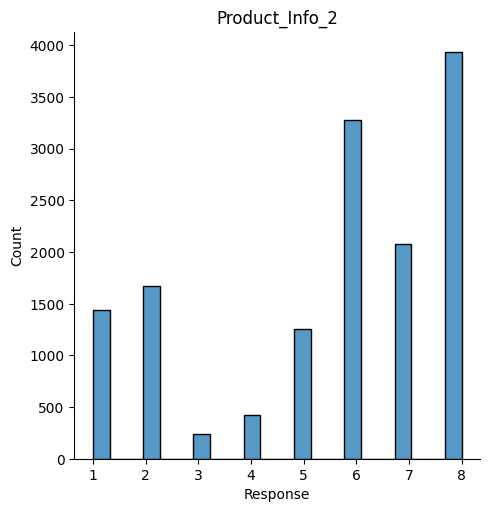

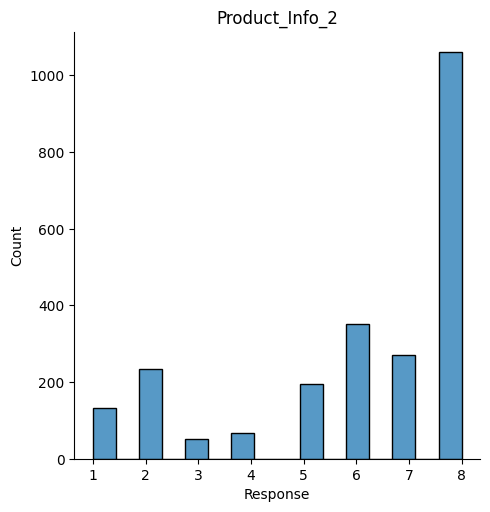

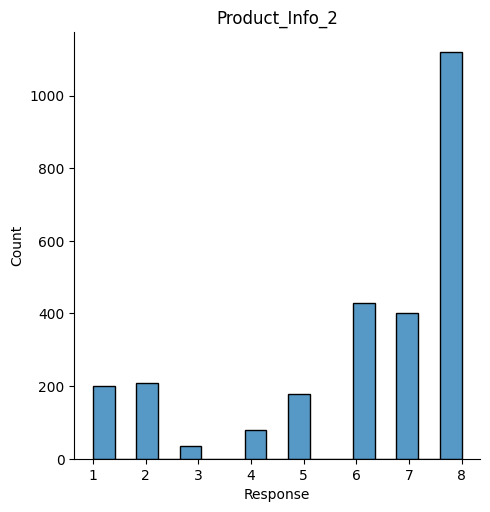

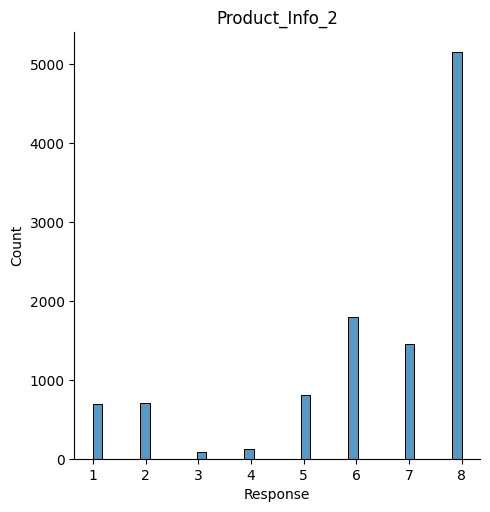

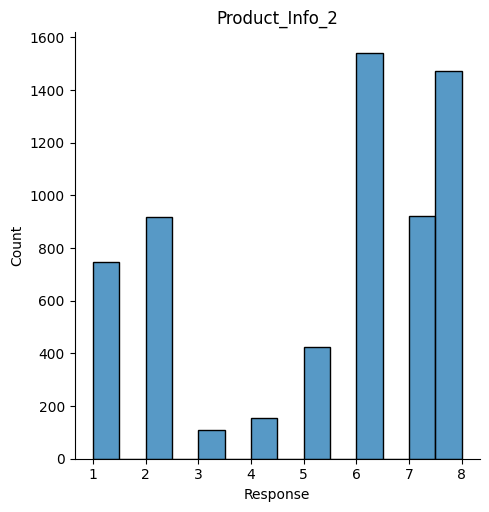

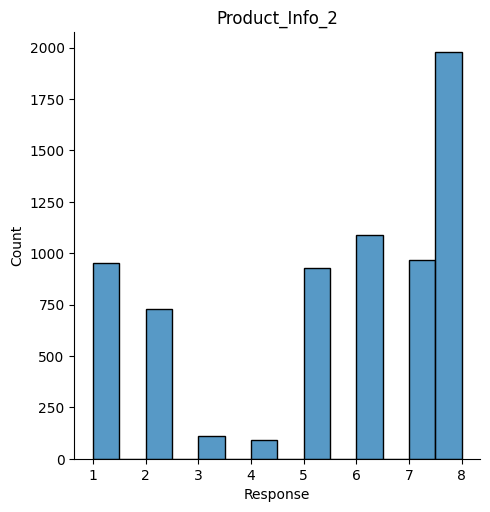

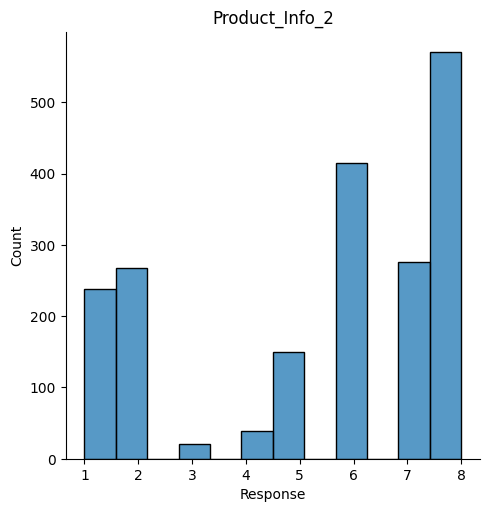

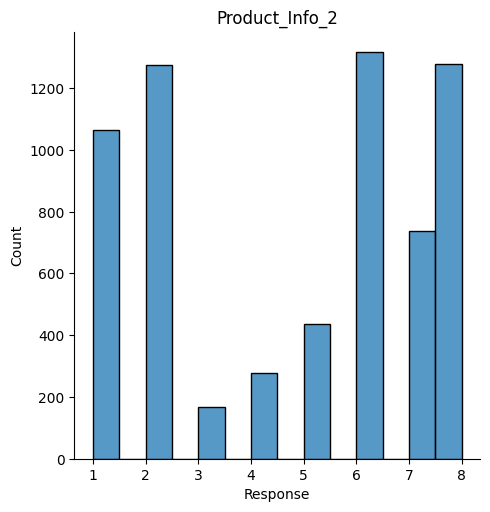

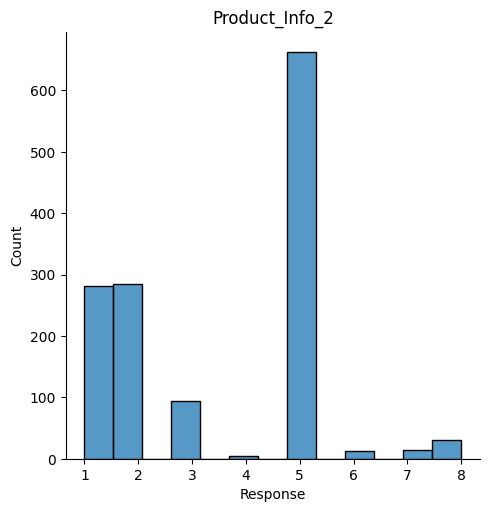

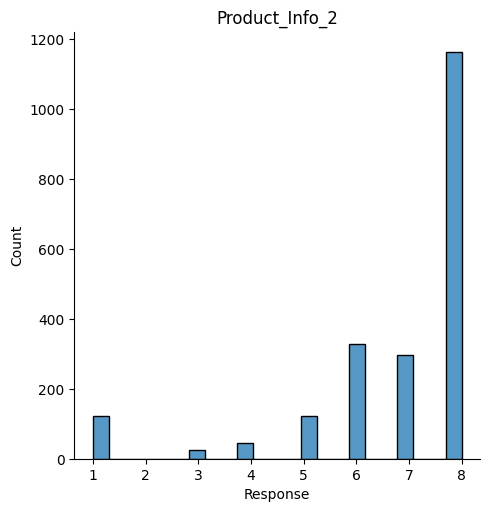

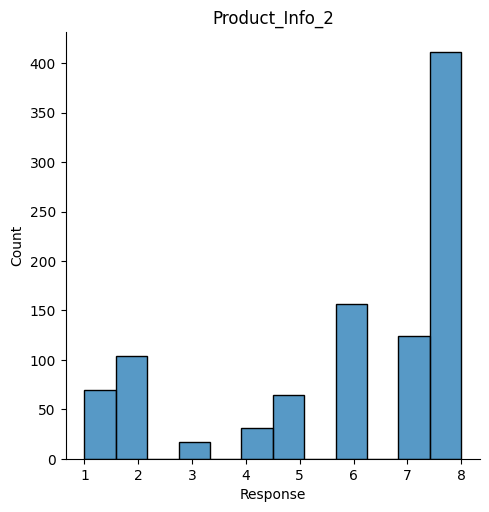

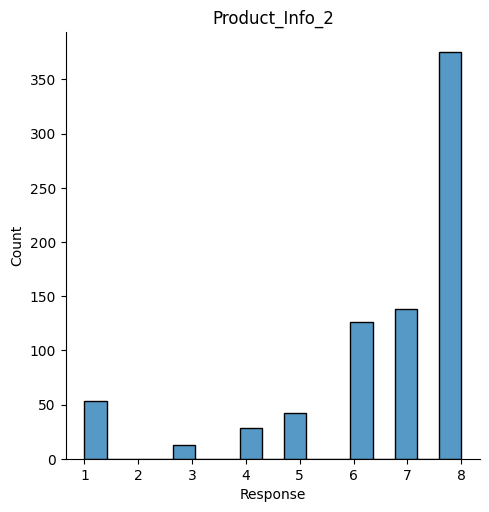

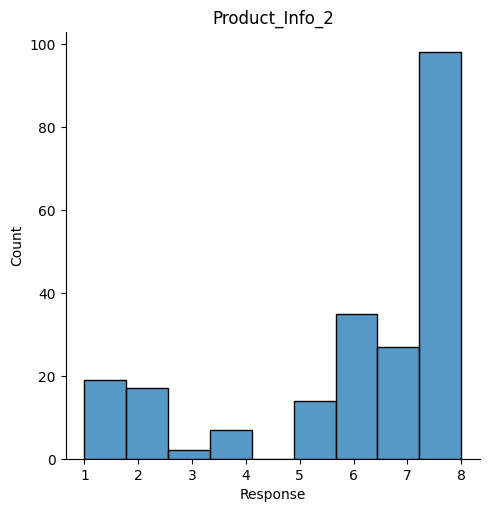

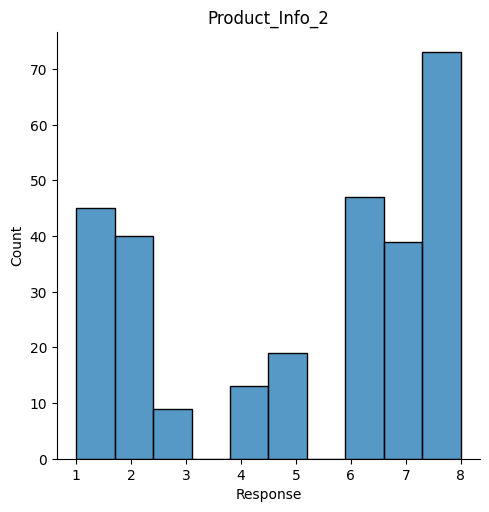

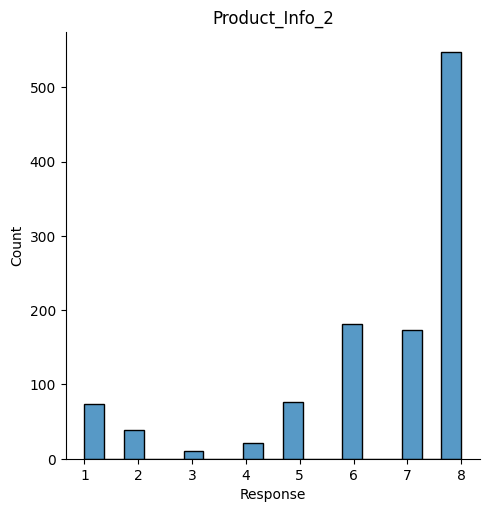

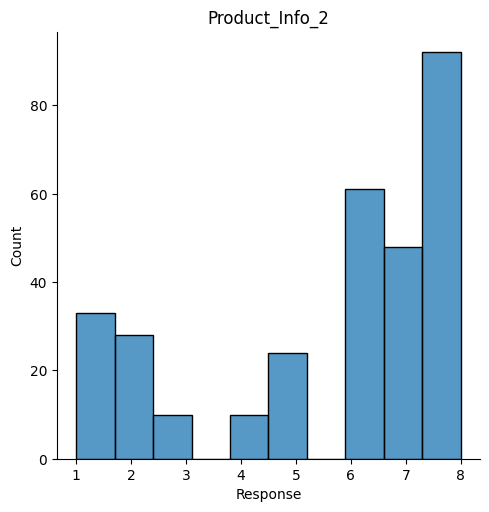

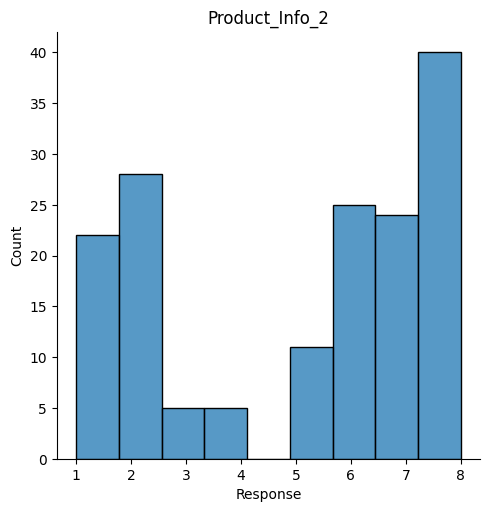

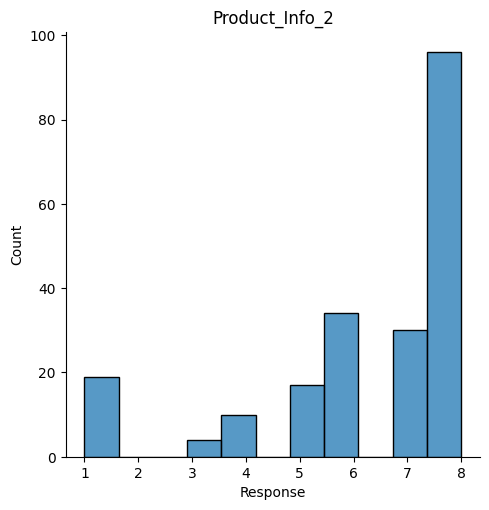

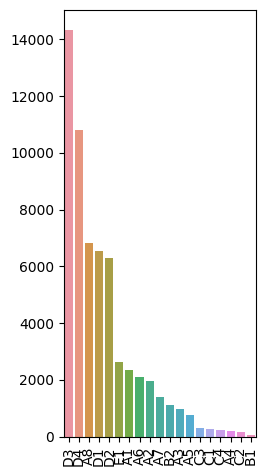

In [ ]:
#Se estima con histogramas la presencia de las variables categóricas a modo de exploración de los datos
plt.figure(figsize=(20,8))
for i, columna in enumerate(["Product_Info_2"]):
  plt.subplot(1, 2, i + 1)
  k = datos[[columna, "Response"]].dropna()
  for v in datos[columna].dropna().unique():
    sns.displot(k.Response[k[columna] == v], label = v)
    plt.title(columna)
  plt.yticks([])
  plt.legend()
  plt.subplot(1, 2, i + 2)
  vc = k[columna].value_counts()
  sns.barplot(x = vc.index, y = vc.values)
  plt.xticks(range(len(vc)), vc.index, rotation = "vertical")

In [ ]:
#Búsqueda de valores no faltantes
valores_faltantes = datos.isnull()
# Obtener la cantidad total de valores no faltantes por columna
cantidad_faltantes = valores_faltantes.sum()
cantidad_faltantes[cantidad_faltantes != 0]
datos.isnull().sum().sum()

393103

#Primer modelo ejecutado.

Para iniciar con un intento de predicción se divide el conjunto de datos en 'train' y 'test'.

Después se llenan los valores faltantes con la moda si se trata de variables categóricas y la mediana si se trata de variables numéricas.

Finalmente se aplica el ajuste de una regresión logística y se calcula el accuracy obteniendo un resultado en ella de aproximadamente 33%

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los archivos de datos
#train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Realizar el preprocesamiento de los datos
# Eliminar la columna "Response" del conjunto de entrenamiento
X_train = datos.drop(columns = ['Id', 'Response'])
y_train = datos['Response']
X_test = test_data.drop(columns = ['Id'])

# Imputar los valores faltantes en los datos numéricos con la mediana
num_cols = X_train.select_dtypes(include='number').columns
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Imputar los valores faltantes en los datos categóricos con la moda
cat_cols = X_train.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [ ]:
# Codificar los datos categóricos con OneHotEncoder
ct = ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=0, stratify=y_train)

# Crear una instancia del modelo de Regresión Logística
lr = LogisticRegression(random_state=0)

# Entrenar el modelo con el conjunto de entrenamiento
lr.fit(X_train, y_train)

# Predecir los valores en el conjunto de validación
y_valid_pred = lr.predict(X_valid)

# Calcular la precisión (accuracy) del modelo en el conjunto de validación
acc = accuracy_score(y_valid, y_valid_pred)
print("Precisión en el conjunto de validación:", acc)

Precisión en el conjunto de validación: 0.35758188094636695


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div style="text-align: right">El mensaje de advertencia indica que el algoritmo de optimización no convergió antes de alcanzar el número máximo de iteraciones. Esto puede deberse a que el modelo necesita más iteraciones para converger o porque el conjunto de datos no está bien escalado. Una opción es aumentar el número máximo de iteraciones a través del parámetro max_iter del modelo de Regresión Logística.

Para evaluar la calidad del modelo, se utilizó la precisión (accuracy), que es la proporción de predicciones correctas sobre el total de predicciones.</div>

